In [1]:
import uproot
import os

In [2]:
input_file=uproot.open("/eos/experiment/sndlhc/emulsionData/2022/CERN/emu_reco/RUN1/b000044/trackfiles/rootfiles/57_1/cell_9_9/linked_tracks.root")
input_tree = input_file['tracks']

In [3]:
input_tree.keys()

['trid',
 'nseg',
 'npl',
 'n0',
 'xv',
 'yv',
 'w',
 't.',
 's',
 's/s.fUniqueID',
 's/s.fBits',
 's/s.EdbTrack2D',
 's/s.ePID',
 's/s.eID',
 's/s.eVid[2]',
 's/s.eAid[2]',
 's/s.eFlag',
 's/s.eTrack',
 's/s.eX',
 's/s.eY',
 's/s.eZ',
 's/s.eTX',
 's/s.eTY',
 's/s.eSZ',
 's/s.eChi2',
 's/s.eProb',
 's/s.eW',
 's/s.eVolume',
 's/s.eDZ',
 's/s.eDZem',
 's/s.eP',
 's/s.eMCTrack',
 's/s.eMCEvt',
 's/s.eScanID',
 's/s.eCOV',
 'sf',
 'sf/sf.fUniqueID',
 'sf/sf.fBits',
 'sf/sf.EdbTrack2D',
 'sf/sf.ePID',
 'sf/sf.eID',
 'sf/sf.eVid[2]',
 'sf/sf.eAid[2]',
 'sf/sf.eFlag',
 'sf/sf.eTrack',
 'sf/sf.eX',
 'sf/sf.eY',
 'sf/sf.eZ',
 'sf/sf.eTX',
 'sf/sf.eTY',
 'sf/sf.eSZ',
 'sf/sf.eChi2',
 'sf/sf.eProb',
 'sf/sf.eW',
 'sf/sf.eVolume',
 'sf/sf.eDZ',
 'sf/sf.eDZem',
 'sf/sf.eP',
 'sf/sf.eMCTrack',
 'sf/sf.eMCEvt',
 'sf/sf.eScanID',
 'sf/sf.eCOV']

In [4]:
nsegs = input_tree['nseg'].array() # how many base tracks
npl = input_tree['npl'].array() # how many plates traversed
n0 = input_tree['n0'].array() # how many gaps = npl - nseg

In [11]:
sel_nsegs = nsegs[n0>0]
sel_npl = npl[n0>0]
sel_n0 = n0[n0>0]


NameError: name 'sel_nseg' is not defined

In [13]:
import matplotlib.pyplot as plt

fc-list: symbol lookup error: /cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/libfontconfig.so.1: undefined symbol: FT_Done_MM_Var


In [22]:
import numpy as np
import awkward as awk

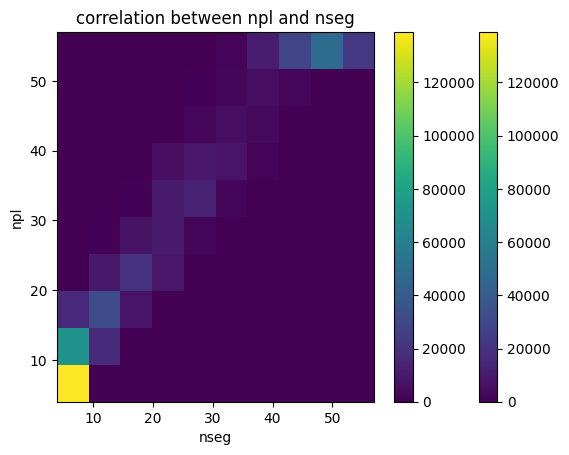

In [30]:
plt.hist2d(np.array(nsegs),np.array(npl))
plt.xlabel("nseg")
plt.ylabel("npl")
plt.title("correlation between npl and nseg")
plt.colorbar()
plt.show()

In [6]:
branchnames = ["s.eX", "s.eY", "s.eZ", "s.eTX", "s.eTY", "s.ePID"]
segments = input_tree.arrays(branchnames)
print(segments['s.eZ'])
#input_tree['s.eZ'].array()

[[-4.41e+04, -4.28e+04, -3.87e+04, ..., -3.96e+03, -2.64e+03, 0], ..., [...]]


In [7]:
branchnames_f = ["sf.eX", "sf.eY", "sf.eZ", "sf.eTX", "sf.eTY", "sf.ePID"]
fittedsegments = input_tree.arrays(branchnames_f)
print(fittedsegments['sf.eZ'])
#input_tree['s.eZ'].array()

[[-4.41e+04, -4.28e+04, -3.87e+04, ..., -3.96e+03, -2.64e+03, 0], ..., [...]]


In [8]:
segments['s.ePlate'] = 57 - segments["s.ePID"]

In [9]:
print(segments['s.eZ'][n0>0][0], sel_npl[0])

[-4.41e+04, -4.28e+04, -3.87e+04, -3.73e+04, ..., -3.96e+03, -2.64e+03, 0] 34


In [10]:
print([(segments['s.eZ'][i], segments['s.ePlate'][i]) for i in range(len(segments))])

[(<Array [-4.01e+03, -2.68e+03, -1.36e+03, 0] type='4 * float32'>, <Array [2, 3, 4, 5] type='4 * int32'>), (<Array [-5.32e+03, -4.01e+03, -2.68e+03, -1.36e+03, 0] type='5 * float32'>, <Array [1, 2, 3, 4, 5] type='5 * int32'>), (<Array [-1.36e+03, 0] type='2 * float32'>, <Array [4, 5] type='2 * int32'>), (<Array [-5.32e+03, -2.68e+03, -1.36e+03, 0] type='4 * float32'>, <Array [1, 3, 4, 5] type='4 * int32'>), (<Array [-5.32e+03, -4.01e+03, -2.68e+03, -1.36e+03, 0] type='5 * float32'>, <Array [1, 2, 3, 4, 5] type='5 * int32'>), (<Array [-5.32e+03, -2.68e+03, -1.36e+03, 0] type='4 * float32'>, <Array [1, 3, 4, 5] type='4 * int32'>), (<Array [-5.32e+03, -4.01e+03, -2.68e+03, -1.36e+03, 0] type='5 * float32'>, <Array [1, 2, 3, 4, 5] type='5 * int32'>), (<Array [-5.32e+03, -4.01e+03, -2.68e+03, -1.36e+03, 0] type='5 * float32'>, <Array [1, 2, 3, 4, 5] type='5 * int32'>), (<Array [-5.32e+03, -2.68e+03, 0] type='3 * float32'>, <Array [1, 3, 5] type='3 * int32'>), (<Array [-2.68e+03, -1.36e+03, 

In [34]:
vtx_file=uproot.open("/eos/experiment/sndlhc/emulsionData/2022/CERN/emu_reco/RUN1/b000044/trackfiles/rootfiles/57_1/cell_9_9/vertextree.root")
vtx_tree = vtx_file['vtx']

In [35]:
vtx_tree.keys()

['vID',
 'flag',
 'vx',
 'vy',
 'vz',
 'vCOV',
 'meanvx',
 'meanvy',
 'meanvz',
 'maxaperture',
 'probability',
 'n',
 't.',
 't./t.fUniqueID',
 't./t.fBits',
 't./t.EdbTrack2D',
 't./t.ePID',
 't./t.eID',
 't./t.eVid[2]',
 't./t.eAid[2]',
 't./t.eFlag',
 't./t.eTrack',
 't./t.eX',
 't./t.eY',
 't./t.eZ',
 't./t.eTX',
 't./t.eTY',
 't./t.eSZ',
 't./t.eChi2',
 't./t.eProb',
 't./t.eW',
 't./t.eVolume',
 't./t.eDZ',
 't./t.eDZem',
 't./t.eP',
 't./t.eMCTrack',
 't./t.eMCEvt',
 't./t.eScanID',
 't./t.eCOV',
 's',
 's/s.fUniqueID',
 's/s.fBits',
 's/s.EdbTrack2D',
 's/s.ePID',
 's/s.eID',
 's/s.eVid[2]',
 's/s.eAid[2]',
 's/s.eFlag',
 's/s.eTrack',
 's/s.eX',
 's/s.eY',
 's/s.eZ',
 's/s.eTX',
 's/s.eTY',
 's/s.eSZ',
 's/s.eChi2',
 's/s.eProb',
 's/s.eW',
 's/s.eVolume',
 's/s.eDZ',
 's/s.eDZem',
 's/s.eP',
 's/s.eMCTrack',
 's/s.eMCEvt',
 's/s.eScanID',
 's/s.eCOV',
 'sf',
 'sf/sf.fUniqueID',
 'sf/sf.fBits',
 'sf/sf.EdbTrack2D',
 'sf/sf.ePID',
 'sf/sf.eID',
 'sf/sf.eVid[2]',
 'sf/sf.eAid[2

In [39]:
ntracks = vtx_tree['n'].array()
flag = vtx_tree['flag'].array()

In [44]:
selected_flag = flag[ntracks>3]
selected_ntracks = ntracks[ntracks>3]

In [46]:
print(selected_ntracks[0],selected_flag[0])

7 5
